# Classification 
Ideas to try 
- [] MinMax scaling?

In [1]:
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import scipy
from scipy.sparse.linalg import svds 

In [2]:
data = pd.read_csv("mirnas_all.txt", sep="\t")
labels = pd.read_csv("mirnas_labels_all.txt", sep="\t")

In [67]:
labels.head()

,Unnamed: 0,dataset_id,class_id,class_name,sample_id,cancer_type,cancer_subtype,metastasis_status,primary_site,metastasis_site,sample_label
0,0,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279964,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
1,1,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279974,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
2,2,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279975,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
3,3,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279977,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
4,4,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279978,breast cancer,NaN,YES,breast,lung,Metastasis Tumor


In [68]:
data.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,GSM279966,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,9.437047,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,5.645465,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,6.017919,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,7.529658,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,3.048298,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [66]:
count = 0
for i in data.columns:
    if "." in i:
        count+=1
print(count)

586


In [60]:
for i in data:
    print i


GSM279964
GSM279974
GSM279975
GSM279977
GSM279978
GSM279958
GSM279961
GSM279963
GSM279965
GSM279966
GSM279968
GSM279969
GSM279971
GSM279972
GSM279973
GSM279979
GSM279980
GSM279981
GSM279983
GSM279984
GSM279985
GSM279986
GSM279987
GSM305365
GSM305366
GSM305367
GSM305370
GSM305386
GSM305387
GSM305388
GSM305352
GSM305353
GSM305354
GSM305355
GSM305356
GSM305357
GSM305358
GSM305359
GSM305360
GSM305361
GSM305362
GSM305363
GSM305364
GSM305368
GSM305369
GSM305371
GSM305372
GSM305373
GSM305374
GSM305375
GSM305376
GSM305377
GSM305378
GSM305379
GSM305380
GSM305381
GSM305382
GSM305383
GSM305384
GSM305385
GSM308280
GSM308303
GSM308326
GSM308366
GSM308372
GSM308374
GSM308397
GSM308261
GSM308291
GSM308299
GSM308307
GSM308316
GSM308392
GSM308402
GSM308413
GSM308264
GSM308271
GSM308274
GSM308296
GSM308301
GSM308310
GSM308312
GSM308327
GSM308329
GSM308334
GSM308337
GSM308341
GSM308351
GSM308353
GSM308357
GSM308380
GSM308388
GSM308406
GSM308409
GSM308256
GSM308257
GSM308258
GSM308259
GSM308260
GSM308262


In [3]:
data.head()

,Unnamed: 0,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [4]:
data = data.set_index("Unnamed: 0")

In [5]:
labels.tail()

,Unnamed: 0,dataset_id,class_id,class_name,sample_id,cancer_type,cancer_subtype,metastasis_status,primary_site,metastasis_site,sample_label
1693,723,GSE85258,2,primary tumor,GSM2263294,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1694,724,GSE85258,2,primary tumor,GSM2263295,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1695,725,GSE85258,2,primary tumor,GSM2263298,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1696,726,GSE85258,2,primary tumor,GSM2263299,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1697,727,GSE85258,2,primary tumor,GSM2263302,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor


## Playing with SKlearn's PCA

In [69]:
data.shape

(54675, 1698)

In [10]:
#pca = PCA(n_components=1000)

In [11]:
#pca.fit(data)

In [12]:
#pca.n_features_

In [23]:
# jiaqi's PCA (very slow, uses eigsh)
def PCA(x, k):
    # Z = W * X
    # Z is weight matrix 
    # W is feature matrix 
    # X is input 
    
    # get zero mean, column-wise
    means = np.mean(x.T, axis=1)
    x_mean = x - means
    
    # covariance of centered/zero-mean matrix
    #V = np.cov(x_mean)
    V = x_mean.dot(x_mean.T) / (x_mean.shape[1]-1)

    # eigendecomposition 
    # y = lambda (eigen values)
    # u = eigen vectors 
    y, u = scipy.sparse.linalg.eigsh(V, k = k)
    
    # project data
    #P = u.T.dot(x_mean)
    

    # diagonalization to get feature matrix 
    #w = np.dot(np.diag(1/np.sqrt(y)), u.T)
    
    # w is features 
    #w = np.diag( 1.0/np.sqrt(y)).dot(u.T)
    w = np.linalg.inv(np.diag(np.sqrt(y))).dot(u.T)
    print(np.diag(np.sqrt(y)).shape)
    # check identity 
    # print(np.round(np.dot(np.dot(w,V),w.T),3))
    
    # z is weights 
    z = np.dot(w, x_mean)
    
    return w, z, y, u

In [7]:
# tiffany's PCA, uses SVD
def PCA(PCA_K, input_data):

    total_dim, sample_n = input_data.shape

    data_mean = np.reshape(np.mean(input_data, axis=1),(total_dim,1))
    data_demean = np.subtract(input_data, data_mean)

    u, s, vt = svds(data_demean, k=PCA_K)

    PCA_weights = np.matmul(np.transpose(u), data_demean)
    
    return PCA_weights, u, s, data_mean


In [8]:
np_data = np.array(data)

In [13]:
# s[300:373]
# temp = np_data[:,:100]
# temp.shape

In [9]:
weights, u, s, mean = PCA(500,np_data)

In [14]:
pca_data = np.matmul(np.transpose(u[:,300:373]), np.subtract(np_data,mean))

In [15]:
pca_data.shape

(73, 1698)

### playing around with pca
s is the singular values 
we chose cut off of ~ 50-73

In [16]:
max(s)

12618202.875370227

In [17]:
len(s[s>0])

373

<Container object of 373 artists>

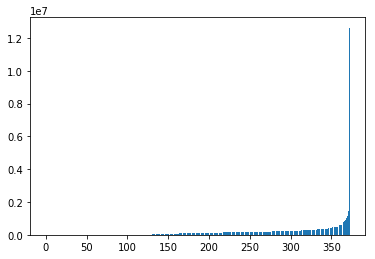

In [18]:
plt.bar(xrange(0,len(s[s>0])), s[s>0])

## Split into train/test

In [21]:
pd_pca=pd.DataFrame(pca_data)

In [27]:
pd_pca.columns=data.columns

In [30]:
data.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,GSM279966,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,9.437047,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,5.645465,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,6.017919,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,7.529658,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,3.048298,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [56]:
pd_pca['GSM2263299']

0         14.586898
1         35.531745
2        -72.759030
3          2.158655
4         16.359002
5         28.138949
6        -14.769788
7         73.399496
8         41.323664
9        -38.463217
10        34.466251
11        90.736245
12        -4.906185
13       -34.023895
14       -16.370958
15         8.418722
16        -6.705477
17         3.664590
18        28.078988
19       -61.573656
20       -78.118088
21       100.075373
22        59.965828
23       124.596828
24       -46.422044
25       -21.039536
26       177.861971
27        33.232340
28        74.841542
29       -19.454630
          ...      
43      -129.835677
44       -43.074063
45      -329.613119
46      -370.118130
47        81.004570
48       133.702766
49      -235.873813
50       483.152149
51       235.697529
52       -57.999179
53      -647.563672
54       147.434085
55       529.604166
56       277.133614
57       371.315411
58       -23.901692
59       471.673489
60       828.949248
61      -962.280132


In [58]:
count = 0
for i in (data['GSM2263299']==data['GSM2263299.1']):
    if not i:
        count+=1
print(count)

0


In [47]:
pd_pca.columns[1697]

'GSM2263302.1'

In [39]:
len(pd_pca.columns[1600])

10

In [46]:
count =0
for i in pd_pca.columns:
    if len(i) == 12:
        count+=1
print(count)

174


In [28]:
pd_pca.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,GSM279966,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
0,6.113539,9.840838,10.535911,9.430606,10.020341,8.750658,4.458434,4.347000,5.986019,2.396845,...,12.134059,13.402378,12.521788,12.951775,10.537441,10.886892,8.944379,11.780838,14.586898,10.282938
1,34.492623,32.518924,30.121380,30.146619,33.708064,28.525551,29.086432,29.355584,34.605476,26.348307,...,29.154563,33.962322,33.088768,36.846206,30.187063,33.247228,33.138447,33.103163,35.531745,33.065391
2,-76.920767,-81.722493,-82.103172,-82.685976,-79.119411,-75.912681,-81.343598,-86.615213,-84.079297,-82.473335,...,-72.996355,-75.547546,-76.014181,-77.664144,-72.012390,-74.545009,-74.336952,-73.041318,-72.759030,-73.033290
3,0.762764,-4.131722,-2.644813,3.548385,-1.136126,1.872642,0.185429,-3.259932,-3.546903,-2.214959,...,4.872621,2.506311,1.090215,2.270660,2.367209,4.268251,3.313596,2.507046,2.158655,7.624384
4,23.983056,22.180516,26.887832,25.801799,31.195026,16.737051,24.301195,21.793654,24.025618,24.282982,...,17.969475,16.006391,13.728396,16.983234,15.362163,21.399902,20.519502,20.019203,16.359002,18.621929


In [20]:
pca_data.to_csv("mirnas_all_pca_500_73.txt", sep="\t")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
# train test split 
random.seed(69)
ii = np.random.rand(len(data)) < 0.7 

np_data = data.values
np_types = types.values
np_labels = labels.values

# scaling data 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_data_min_max = min_max_scaler.fit_transform(np_data)

train = np_data_min_max[ii]
test = np_data_min_max[~ii]

# train = np_data[ii]
# test = np_data[~ii]

pand_train = data[ii]
pand_test = data[~ii]